In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from scipy.interpolate import interp1d
import matplotlib.cm as cm
from salishsea_tools import (nc_tools, gsw_calls, geo_tools, viz_tools)
import seabird
import cmocean as cmo

In [2]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

# Z = bathy.variables['Bathymetry'][y_wcvi_slice,x_wcvi_slice]
Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)

# grid = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/grid/coordinates_NEMO/coordinates_westcoast_seagrid_high_resolution_truncated_wider_west_bdy.nc')


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]

In [3]:
NEP_iso_jul = nc.Dataset('/home/ssahu/saurav/jul_along_iso.nc')

In [4]:
nc_tools.show_variables(NEP_iso_jul)

odict_keys(['x', 'y', 'isot', 'time_counter', 'spiciness'])


In [5]:
spic_jul_iso = NEP_iso_jul.variables['spiciness']
iso_rho_levels = NEP_iso_jul.variables['isot'] 

In [31]:
zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht']


NEP_jul = nc.Dataset('/home/ssahu/saurav/NEP36_T_S_Spice_july.nc')


sal_jul  = NEP_jul.variables['vosaline']
temp_jul = NEP_jul.variables['votemper']
spic_jul = NEP_jul.variables['spiciness']
rho_jul = NEP_jul.variables['density']



/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


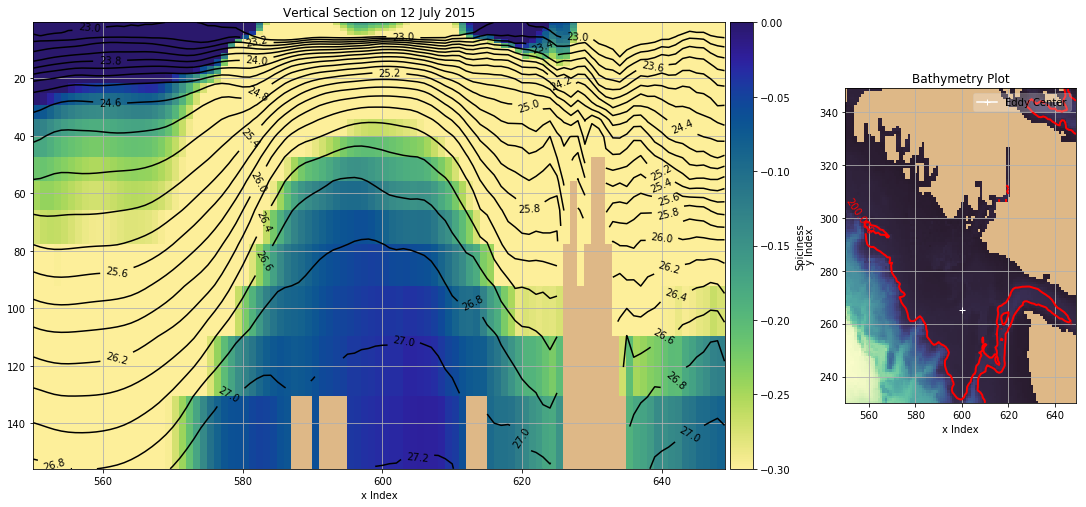

In [34]:
# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))



viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[230:350,550:650], cmap=cmap, vmin=0)
axr.plot(
    600, 265,
    linestyle='-', marker='+', color='white',
    label='Eddy Center',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_wcvi_slice,y_wcvi_slice,Z[230:350,550:650], levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 12 
cmap = plt.get_cmap(cmo.cm.haline_r)
cmap.set_bad(land_colour)
spic_0 = spic_jul[t, :25, :,:]

spic_tzyx = np.ma.array(spic_0, mask = np.logical_not(sal_tzyx))
x, z = np.meshgrid(x_wcvi_slice, zlevels[:25])
mesh = axl.pcolormesh(x_wcvi_slice, zlevels[:25], spic_tzyx[:25,265,x_wcvi_slice], cmap=cmap, vmin=-0.3, vmax=0)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Spiciness')
clines = axl.contour(x_wcvi_slice, zlevels[:25], rho_tzyx[:25,265,x_wcvi_slice], np.arange(23, 30, 0.2), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical Section on {0} July 2015'.format(t))

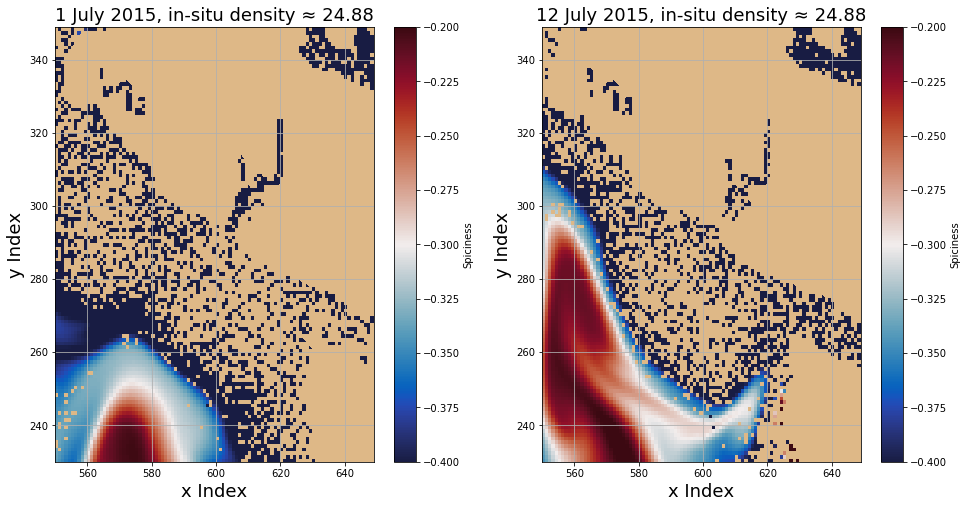

In [11]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


t_jul_1 = 0
t_jul_2 = 11
level = 60



fig, (ax2,ax1) = plt.subplots(1, 2, figsize=(16,8)); ax1.grid()
spic_tzyx = spic_jul_iso[t_jul_1,level,:,:]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax2.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)

viz_tools.plot_land_mask(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
ax2.grid()
ax2.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax2.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax2.set_xlabel('x Index',fontsize=18)
ax2.set_ylabel('y Index',fontsize=18)
ax2.set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t_jul_1+1, d=iso_rho_levels[level], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax2, label='Spiciness')



spic_tzyx = spic_jul_iso[t_jul_2,level,:,:]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax1.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)

viz_tools.plot_land_mask(ax1, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
ax1.grid()
ax1.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax1.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax1.set_xlabel('x Index',fontsize=18)
ax1.set_ylabel('y Index',fontsize=18)
ax1.set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t_jul_2+1, d=iso_rho_levels[level], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax1, label='Spiciness')


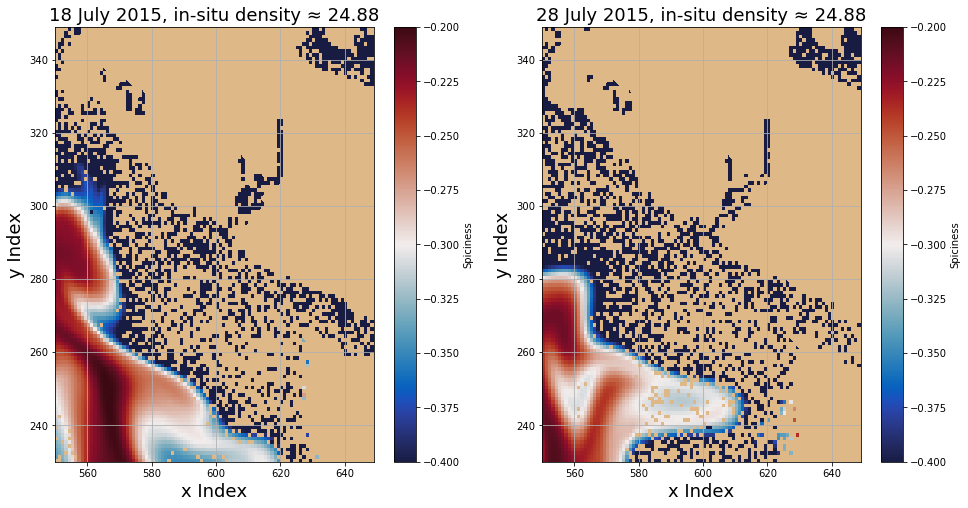

In [12]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


t_jul_1 = 17
t_jul_2 = 27
level = 60



fig, (ax2,ax1) = plt.subplots(1, 2, figsize=(16,8)); ax1.grid()
spic_tzyx = spic_jul_iso[t_jul_1,level,:,:]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax2.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)

viz_tools.plot_land_mask(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
ax2.grid()
ax2.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax2.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax2.set_xlabel('x Index',fontsize=18)
ax2.set_ylabel('y Index',fontsize=18)
ax2.set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t_jul_1+1, d=iso_rho_levels[level], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax2, label='Spiciness')



spic_tzyx = spic_jul_iso[t_jul_2,level,:,:]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax1.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)

viz_tools.plot_land_mask(ax1, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
ax1.grid()
ax1.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax1.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax1.set_xlabel('x Index',fontsize=18)
ax1.set_ylabel('y Index',fontsize=18)
ax1.set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t_jul_2+1, d=iso_rho_levels[level], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax1, label='Spiciness')


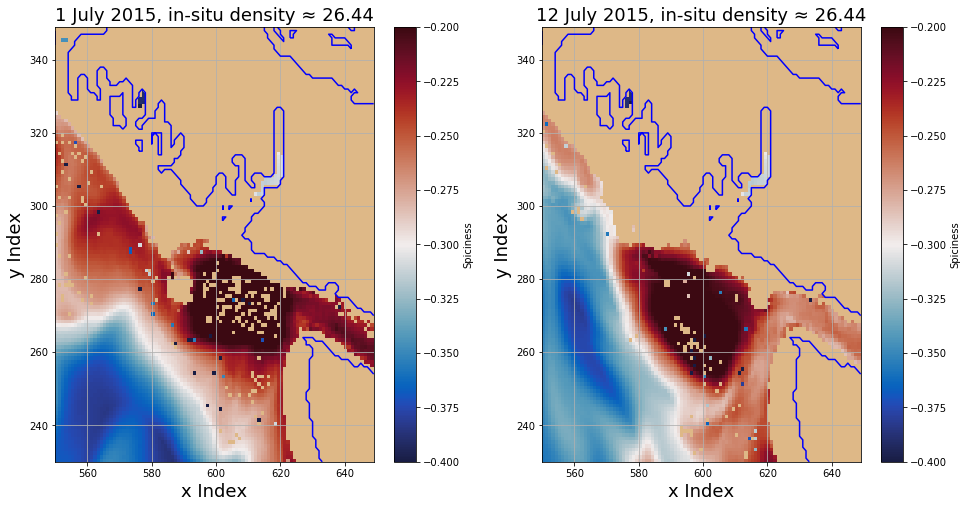

In [37]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


t_jul_1 = 0
t_jul_2 = 11
level = 110



fig, (ax2,ax1) = plt.subplots(1, 2, figsize=(16,8)); ax1.grid()
spic_tzyx = spic_jul_iso[t_jul_1,level,:,:]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax2.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)

viz_tools.plot_land_mask(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(ax2, bathy ,xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='blue')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
ax2.grid()
ax2.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax2.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax2.set_xlabel('x Index',fontsize=18)
ax2.set_ylabel('y Index',fontsize=18)
ax2.set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t_jul_1+1, d=iso_rho_levels[level], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax2, label='Spiciness')



spic_tzyx = spic_jul_iso[t_jul_2,level,:,:]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax1.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)

viz_tools.plot_land_mask(ax1, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(ax1, bathy ,xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='blue')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
ax1.grid()
ax1.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax1.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax1.set_xlabel('x Index',fontsize=18)
ax1.set_ylabel('y Index',fontsize=18)
ax1.set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t_jul_2+1, d=iso_rho_levels[level], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax1, label='Spiciness')


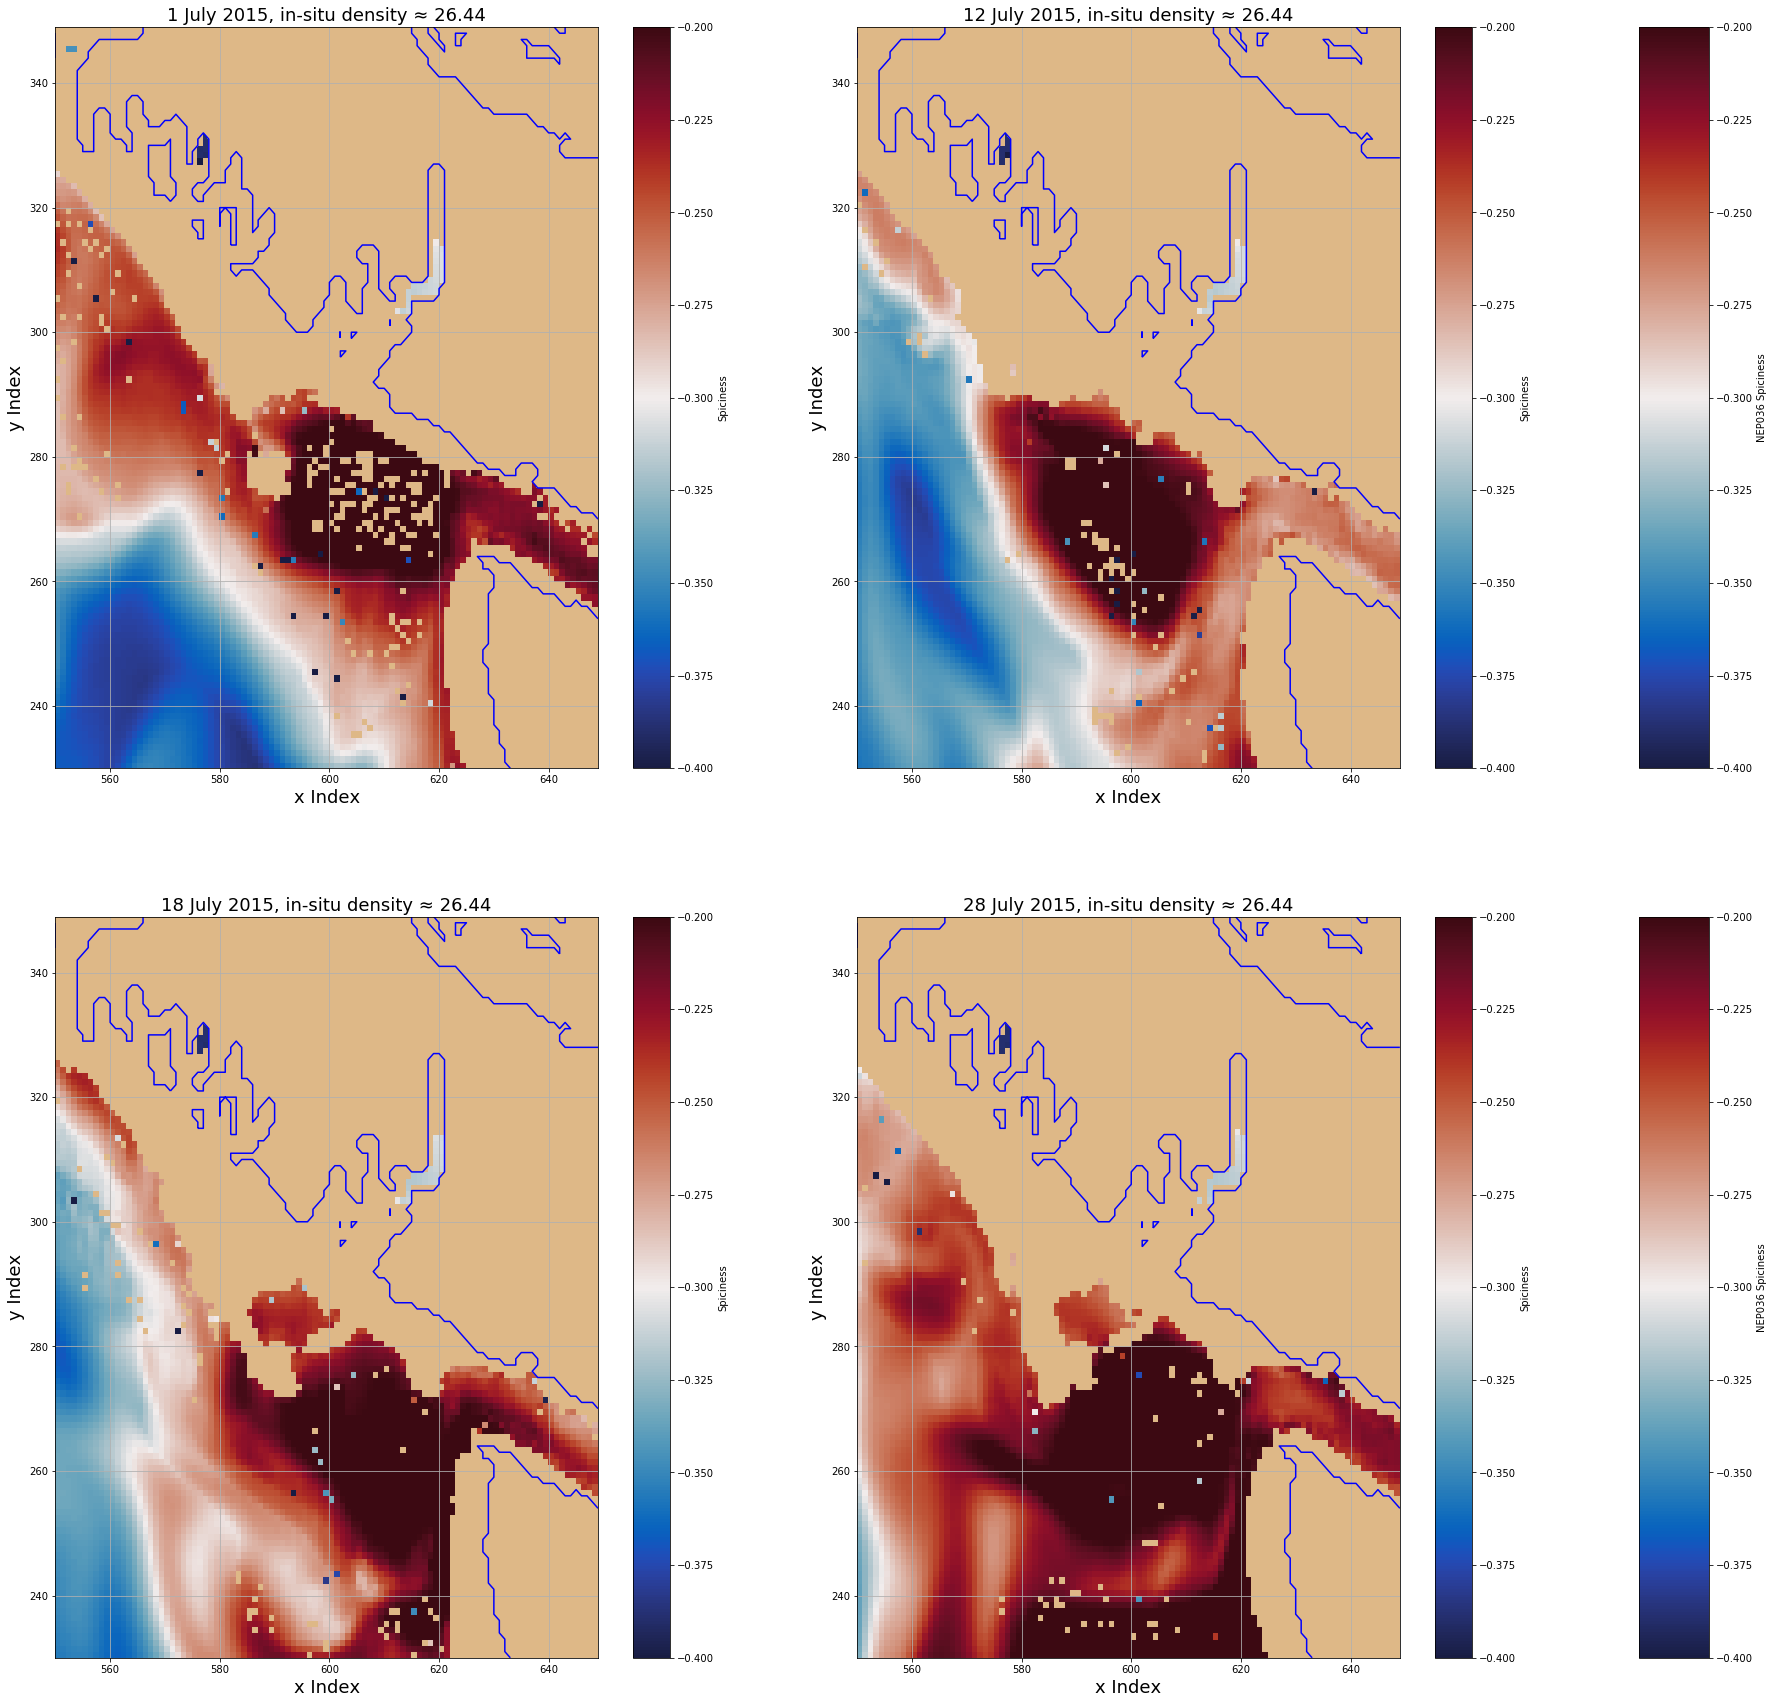

In [13]:
t_1 =0 
t_2 = 11
t_3 = 17
t_4 = 27
level = 110



cmap = plt.get_cmap(cmo.cm.haline)
cmap.set_bad('burlywood')

import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=-1,vmax=0)

fig, axs = plt.subplots(2, 3, figsize=(30, 30), gridspec_kw={'width_ratios': [10, 10, 1]})

# Set up the figure and axes
# fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(12, 8))
land_colour = 'burlywood'
# for ax in (axl, axr):
#     ax.set_axis_bgcolor(land_colour)
# axl.set_position((0.125, 0.125, 0.6, 0.775))
# axcb.set_position((0.73, 0.125, 0.02, 0.775))
# axr.set_position((0.83, 0.125, 1.3, 0.775))

# Plot 24h average salinity at all depths along thalweg line
# viz_tools.set_aspect(axs[0])
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad(land_colour)

spic_tzyx = spic_jul_iso[t_1,level,...]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(axs[0,0])
mesh = axs[0,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)
viz_tools.plot_land_mask(axs[0,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(axs[0,0], bathy ,xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='blue')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
axs[0,0].grid()
axs[0,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[0,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[0,0].set_xlabel('x Index',fontsize=18)
axs[0,0].set_ylabel('y Index',fontsize=18)
axs[0,0].set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t_1+1, d=iso_rho_levels[level], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=axs[0,0], label='Spiciness')






spic_tzyx = spic_jul_iso[t_2,level,:,:]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(axs[0,1])
mesh = axs[0,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)
viz_tools.plot_land_mask(axs[0,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(axs[0,1], bathy ,xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='blue')
axs[0,1].grid()
axs[0,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[0,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[0,1].set_xlabel('x Index',fontsize=18)
axs[0,1].set_ylabel('y Index',fontsize=18)
axs[0,1].set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t_2+1, d=iso_rho_levels[level], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=axs[0,1], label='Spiciness')




cbar = plt.colorbar(mesh, cax=axs[0,2])
cbar.set_label('NEP036 Spiciness')



spic_tzyx = spic_jul_iso[t_3,level,...]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(axs[1,0])
mesh = axs[1,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)
viz_tools.plot_land_mask(axs[1,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(axs[1,0], bathy ,xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='blue')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
axs[1,0].grid()
axs[1,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[1,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[1,0].set_xlabel('x Index',fontsize=18)
axs[1,0].set_ylabel('y Index',fontsize=18)
axs[1,0].set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t_3+1, d=iso_rho_levels[level], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=axs[1,0], label='Spiciness')


spic_tzyx = spic_jul_iso[t_4,level,...]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(axs[1,1])
mesh = axs[1,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)
viz_tools.plot_land_mask(axs[1,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(axs[1,1], bathy ,xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='blue')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
axs[1,1].grid()
axs[1,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[1,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[1,1].set_xlabel('x Index',fontsize=18)
axs[1,1].set_ylabel('y Index',fontsize=18)
axs[1,1].set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t_4+1, d=iso_rho_levels[level], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=axs[1,1], label='Spiciness')


cbar = plt.colorbar(mesh, cax=axs[1,2])
cbar.set_label('NEP036 Spiciness')

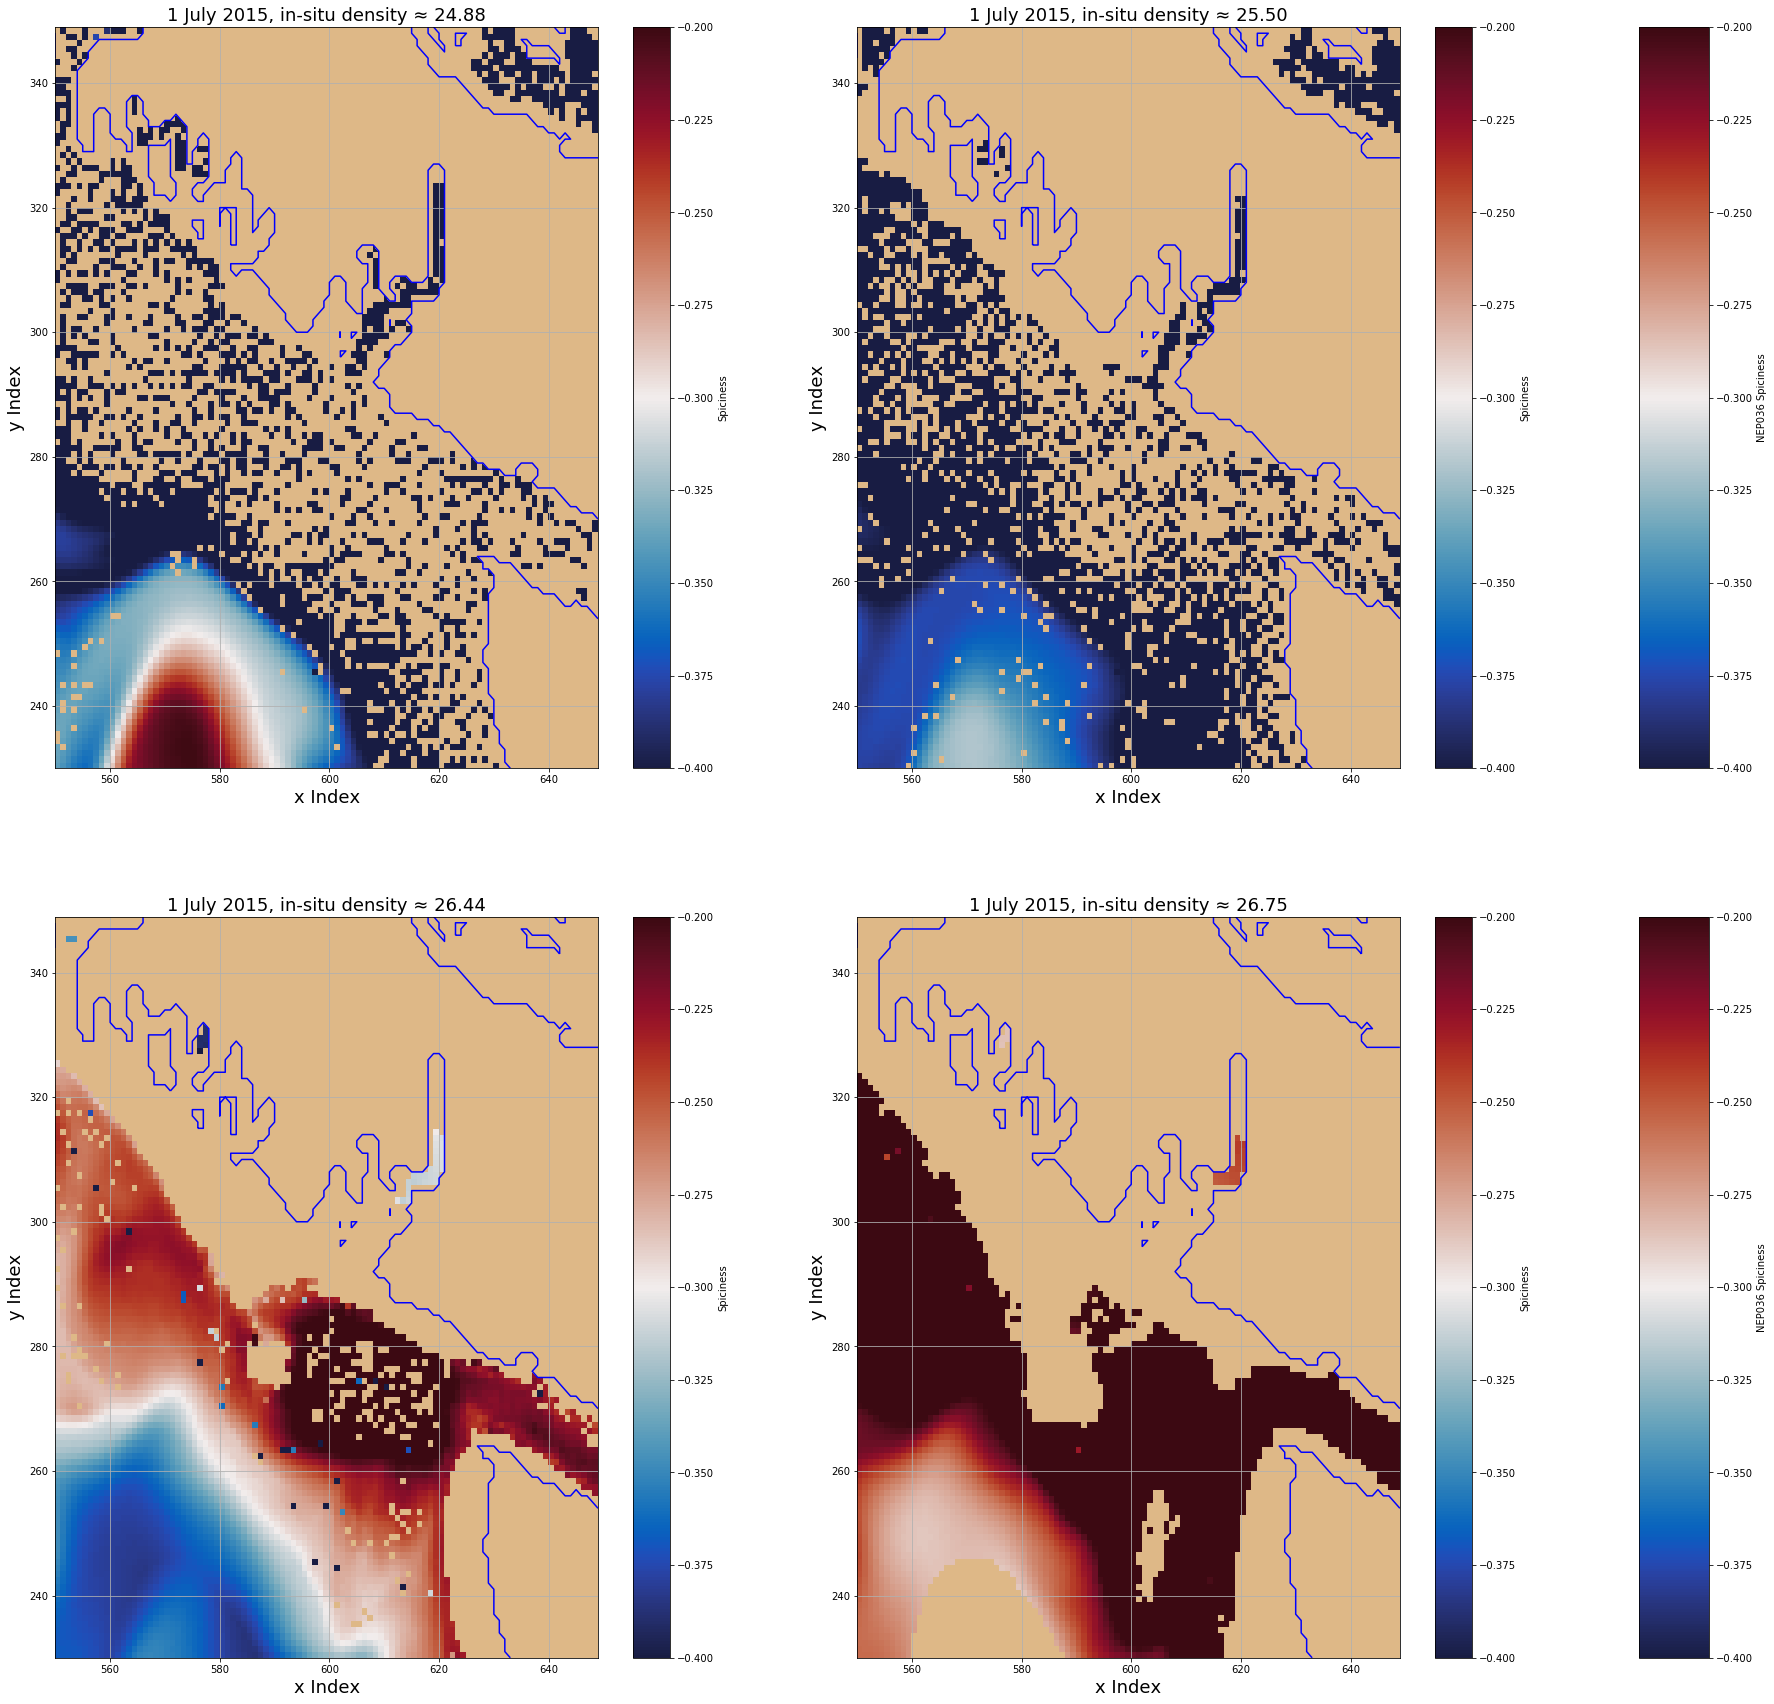

In [21]:
t= 0
level_1 = 60
level_2 = 80
level_3 = 110
level_4 = 120



cmap = plt.get_cmap(cmo.cm.haline)
cmap.set_bad('burlywood')

import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=-1,vmax=0)

fig, axs = plt.subplots(2, 3, figsize=(30, 30), gridspec_kw={'width_ratios': [10, 10, 1]})

# Set up the figure and axes
# fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(12, 8))
land_colour = 'burlywood'
# for ax in (axl, axr):
#     ax.set_axis_bgcolor(land_colour)
# axl.set_position((0.125, 0.125, 0.6, 0.775))
# axcb.set_position((0.73, 0.125, 0.02, 0.775))
# axr.set_position((0.83, 0.125, 1.3, 0.775))

# Plot 24h average salinity at all depths along thalweg line
# viz_tools.set_aspect(axs[0])
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad(land_colour)

spic_tzyx = spic_jul_iso[t,level_1,...]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(axs[0,0])
mesh = axs[0,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)
viz_tools.plot_land_mask(axs[0,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(axs[0,0], bathy ,xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='blue')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
axs[0,0].grid()
axs[0,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[0,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[0,0].set_xlabel('x Index',fontsize=18)
axs[0,0].set_ylabel('y Index',fontsize=18)
axs[0,0].set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t+1, d=iso_rho_levels[level_1], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=axs[0,0], label='Spiciness')






spic_tzyx = spic_jul_iso[t,level_2,:,:]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(axs[0,1])
mesh = axs[0,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)
viz_tools.plot_land_mask(axs[0,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(axs[0,1], bathy ,xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='blue')
axs[0,1].grid()
axs[0,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[0,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[0,1].set_xlabel('x Index',fontsize=18)
axs[0,1].set_ylabel('y Index',fontsize=18)
axs[0,1].set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t+1, d=iso_rho_levels[level_2], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=axs[0,1], label='Spiciness')




cbar = plt.colorbar(mesh, cax=axs[0,2])
cbar.set_label('NEP036 Spiciness')



spic_tzyx = spic_jul_iso[t,level_3,...]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(axs[1,0])
mesh = axs[1,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)
viz_tools.plot_land_mask(axs[1,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(axs[1,0], bathy ,xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='blue')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
axs[1,0].grid()
axs[1,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[1,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[1,0].set_xlabel('x Index',fontsize=18)
axs[1,0].set_ylabel('y Index',fontsize=18)
axs[1,0].set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t+1, d=iso_rho_levels[level_3], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=axs[1,0], label='Spiciness')


spic_tzyx = spic_jul_iso[t,level_4,...]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(axs[1,1])
mesh = axs[1,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)
viz_tools.plot_land_mask(axs[1,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(axs[1,1], bathy ,xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='blue')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
axs[1,1].grid()
axs[1,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[1,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[1,1].set_xlabel('x Index',fontsize=18)
axs[1,1].set_ylabel('y Index',fontsize=18)
axs[1,1].set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t+1, d=iso_rho_levels[level_4], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=axs[1,1], label='Spiciness')


cbar = plt.colorbar(mesh, cax=axs[1,2])
cbar.set_label('NEP036 Spiciness')

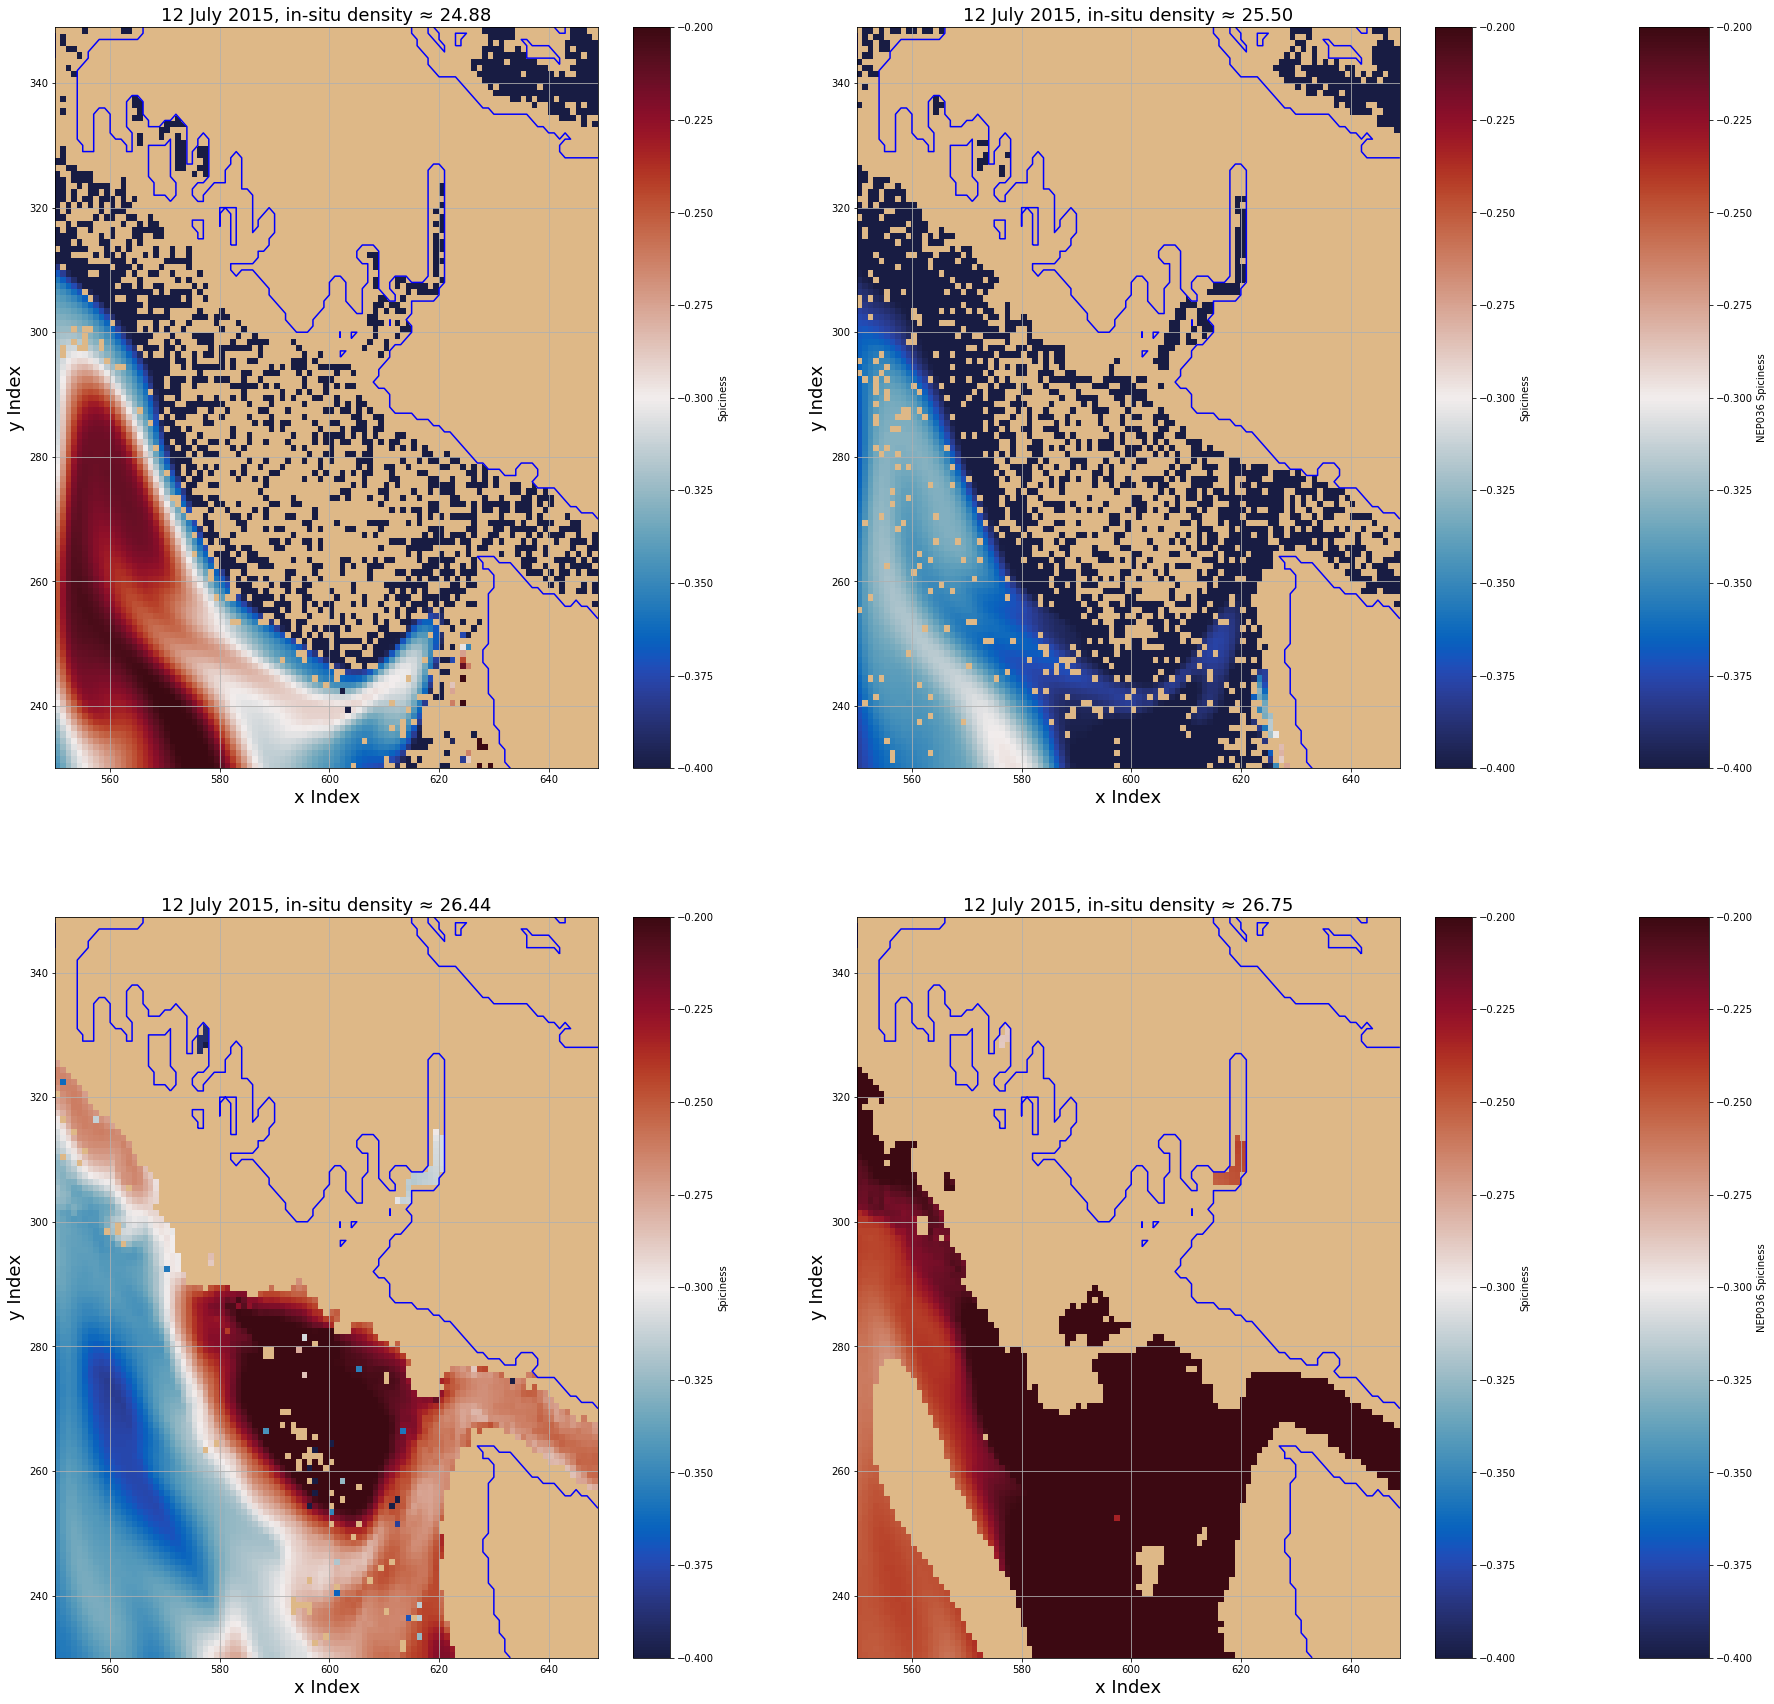

In [22]:
t= 11
level_1 = 60
level_2 = 80
level_3 = 110
level_4 = 120



cmap = plt.get_cmap(cmo.cm.haline)
cmap.set_bad('burlywood')

import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=-1,vmax=0)

fig, axs = plt.subplots(2, 3, figsize=(30, 30), gridspec_kw={'width_ratios': [10, 10, 1]})

# Set up the figure and axes
# fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(12, 8))
land_colour = 'burlywood'
# for ax in (axl, axr):
#     ax.set_axis_bgcolor(land_colour)
# axl.set_position((0.125, 0.125, 0.6, 0.775))
# axcb.set_position((0.73, 0.125, 0.02, 0.775))
# axr.set_position((0.83, 0.125, 1.3, 0.775))

# Plot 24h average salinity at all depths along thalweg line
# viz_tools.set_aspect(axs[0])
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad(land_colour)

spic_tzyx = spic_jul_iso[t,level_1,...]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(axs[0,0])
mesh = axs[0,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)
viz_tools.plot_land_mask(axs[0,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(axs[0,0], bathy ,xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='blue')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
axs[0,0].grid()
axs[0,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[0,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[0,0].set_xlabel('x Index',fontsize=18)
axs[0,0].set_ylabel('y Index',fontsize=18)
axs[0,0].set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t+1, d=iso_rho_levels[level_1], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=axs[0,0], label='Spiciness')






spic_tzyx = spic_jul_iso[t,level_2,:,:]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(axs[0,1])
mesh = axs[0,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)
viz_tools.plot_land_mask(axs[0,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(axs[0,1], bathy ,xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='blue')
axs[0,1].grid()
axs[0,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[0,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[0,1].set_xlabel('x Index',fontsize=18)
axs[0,1].set_ylabel('y Index',fontsize=18)
axs[0,1].set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t+1, d=iso_rho_levels[level_2], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=axs[0,1], label='Spiciness')




cbar = plt.colorbar(mesh, cax=axs[0,2])
cbar.set_label('NEP036 Spiciness')



spic_tzyx = spic_jul_iso[t,level_3,...]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(axs[1,0])
mesh = axs[1,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)
viz_tools.plot_land_mask(axs[1,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(axs[1,0], bathy ,xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='blue')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
axs[1,0].grid()
axs[1,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[1,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[1,0].set_xlabel('x Index',fontsize=18)
axs[1,0].set_ylabel('y Index',fontsize=18)
axs[1,0].set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t+1, d=iso_rho_levels[level_3], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=axs[1,0], label='Spiciness')


spic_tzyx = spic_jul_iso[t,level_4,...]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(axs[1,1])
mesh = axs[1,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)
viz_tools.plot_land_mask(axs[1,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(axs[1,1], bathy ,xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='blue')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
axs[1,1].grid()
axs[1,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[1,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[1,1].set_xlabel('x Index',fontsize=18)
axs[1,1].set_ylabel('y Index',fontsize=18)
axs[1,1].set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t+1, d=iso_rho_levels[level_4], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=axs[1,1], label='Spiciness')


cbar = plt.colorbar(mesh, cax=axs[1,2])
cbar.set_label('NEP036 Spiciness')

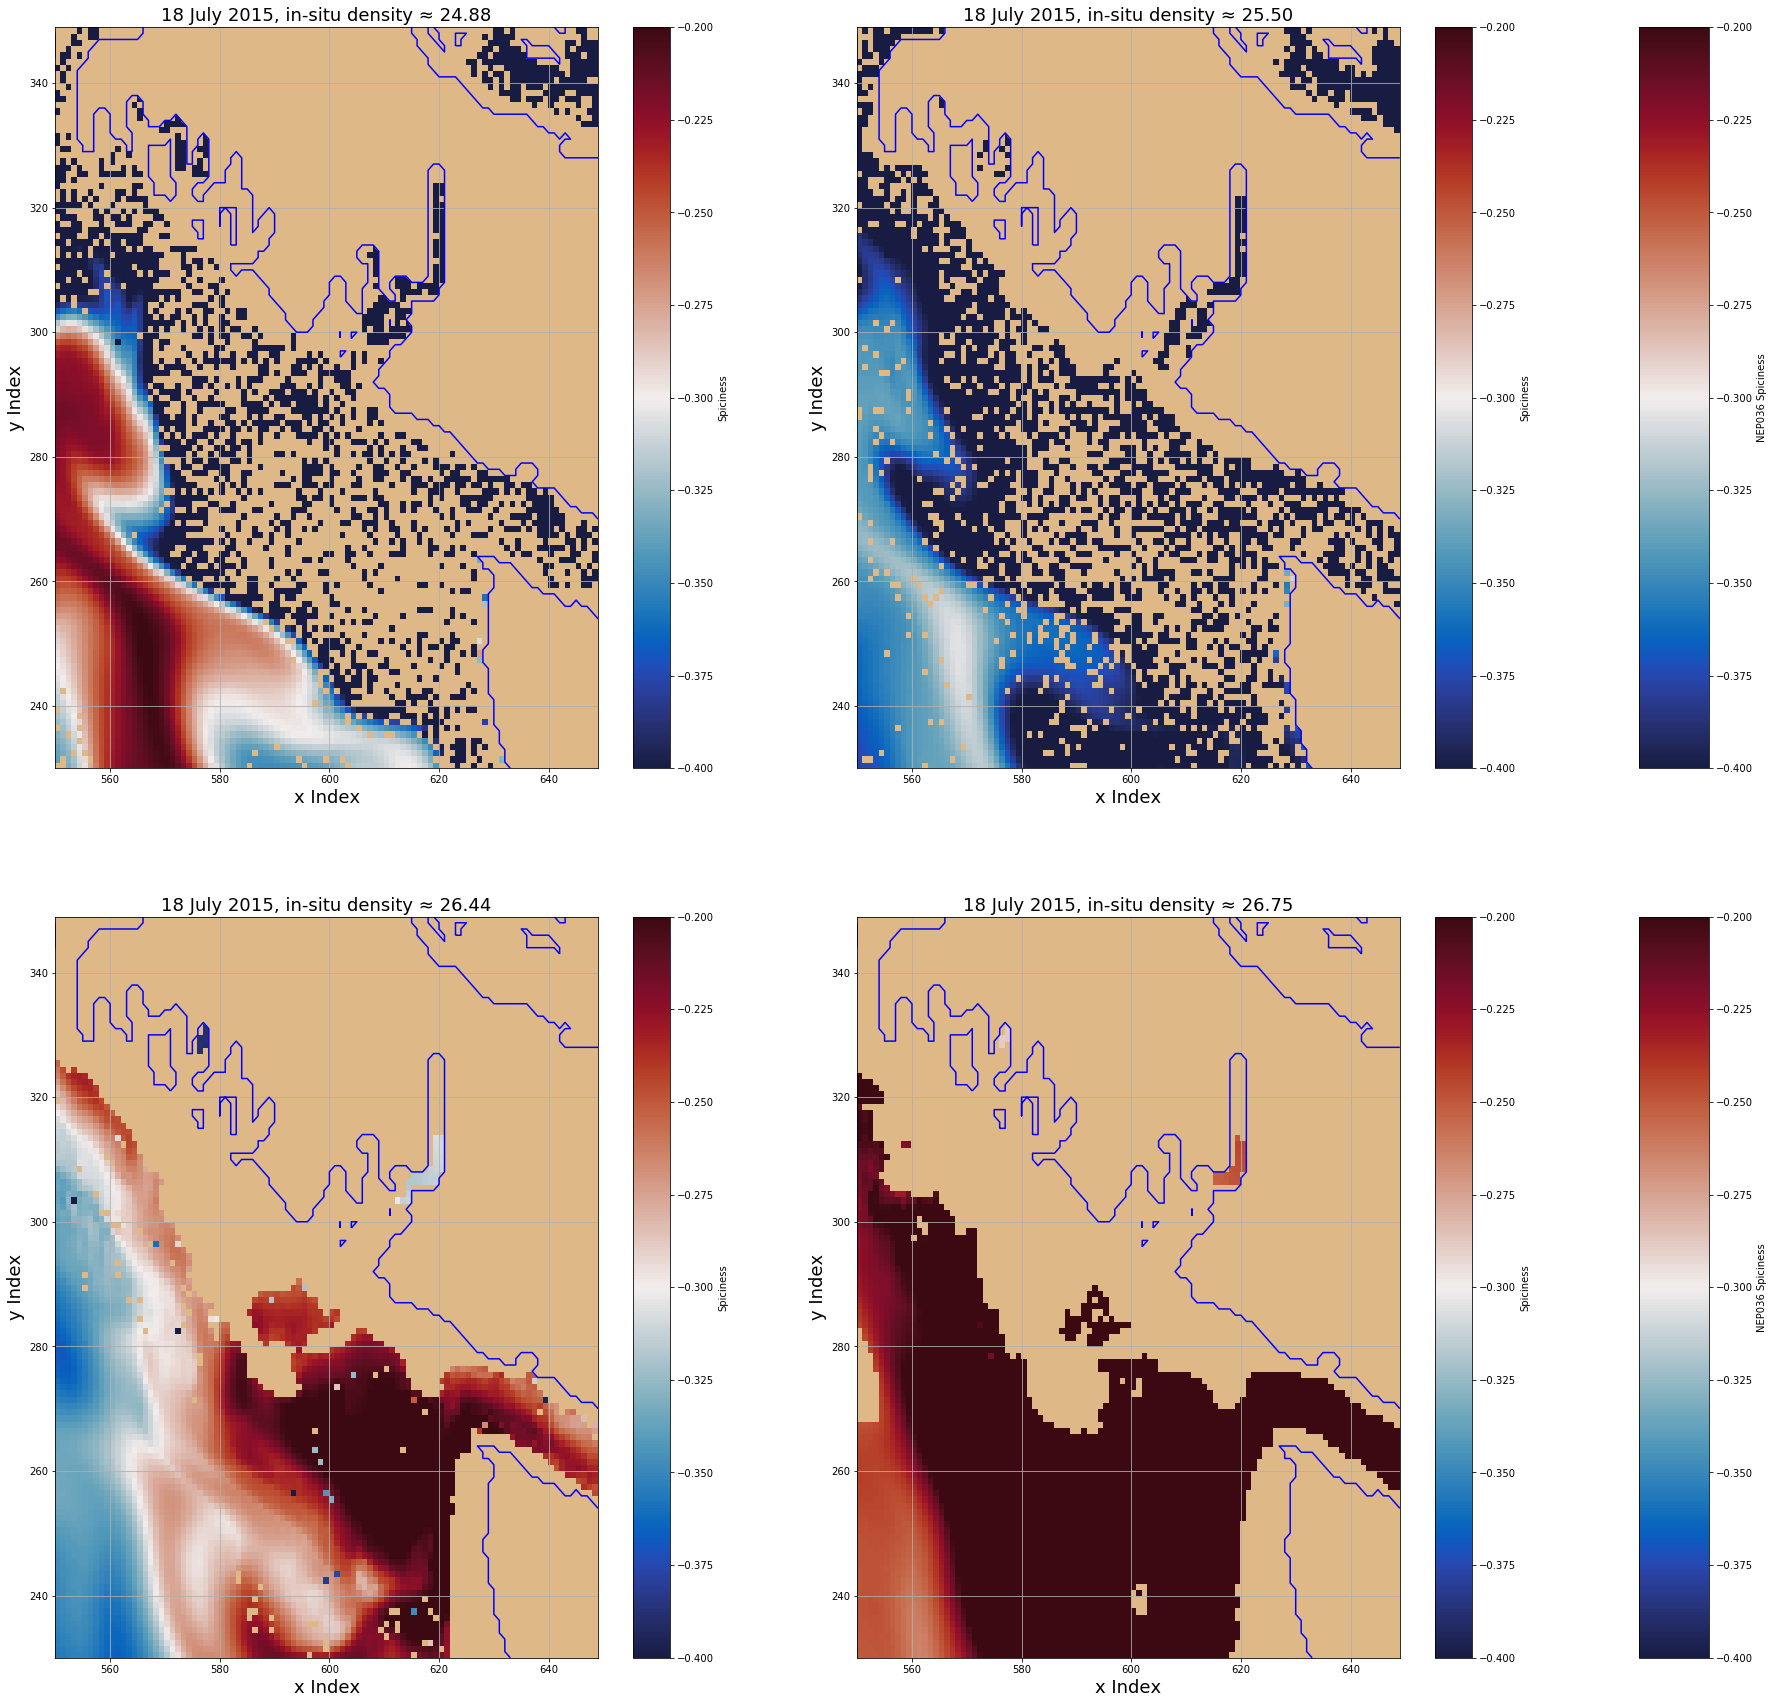

In [23]:
t= 17
level_1 = 60
level_2 = 80
level_3 = 110
level_4 = 120



cmap = plt.get_cmap(cmo.cm.haline)
cmap.set_bad('burlywood')

import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=-1,vmax=0)

fig, axs = plt.subplots(2, 3, figsize=(30, 30), gridspec_kw={'width_ratios': [10, 10, 1]})

# Set up the figure and axes
# fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(12, 8))
land_colour = 'burlywood'
# for ax in (axl, axr):
#     ax.set_axis_bgcolor(land_colour)
# axl.set_position((0.125, 0.125, 0.6, 0.775))
# axcb.set_position((0.73, 0.125, 0.02, 0.775))
# axr.set_position((0.83, 0.125, 1.3, 0.775))

# Plot 24h average salinity at all depths along thalweg line
# viz_tools.set_aspect(axs[0])
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad(land_colour)

spic_tzyx = spic_jul_iso[t,level_1,...]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(axs[0,0])
mesh = axs[0,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)
viz_tools.plot_land_mask(axs[0,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(axs[0,0], bathy ,xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='blue')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
axs[0,0].grid()
axs[0,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[0,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[0,0].set_xlabel('x Index',fontsize=18)
axs[0,0].set_ylabel('y Index',fontsize=18)
axs[0,0].set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t+1, d=iso_rho_levels[level_1], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=axs[0,0], label='Spiciness')






spic_tzyx = spic_jul_iso[t,level_2,:,:]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(axs[0,1])
mesh = axs[0,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)
viz_tools.plot_land_mask(axs[0,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(axs[0,1], bathy ,xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='blue')
axs[0,1].grid()
axs[0,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[0,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[0,1].set_xlabel('x Index',fontsize=18)
axs[0,1].set_ylabel('y Index',fontsize=18)
axs[0,1].set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t+1, d=iso_rho_levels[level_2], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=axs[0,1], label='Spiciness')




cbar = plt.colorbar(mesh, cax=axs[0,2])
cbar.set_label('NEP036 Spiciness')



spic_tzyx = spic_jul_iso[t,level_3,...]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(axs[1,0])
mesh = axs[1,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)
viz_tools.plot_land_mask(axs[1,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(axs[1,0], bathy ,xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='blue')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
axs[1,0].grid()
axs[1,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[1,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[1,0].set_xlabel('x Index',fontsize=18)
axs[1,0].set_ylabel('y Index',fontsize=18)
axs[1,0].set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t+1, d=iso_rho_levels[level_3], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=axs[1,0], label='Spiciness')


spic_tzyx = spic_jul_iso[t,level_4,...]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(axs[1,1])
mesh = axs[1,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)
viz_tools.plot_land_mask(axs[1,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(axs[1,1], bathy ,xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='blue')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
axs[1,1].grid()
axs[1,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[1,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[1,1].set_xlabel('x Index',fontsize=18)
axs[1,1].set_ylabel('y Index',fontsize=18)
axs[1,1].set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t+1, d=iso_rho_levels[level_4], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=axs[1,1], label='Spiciness')


cbar = plt.colorbar(mesh, cax=axs[1,2])
cbar.set_label('NEP036 Spiciness')

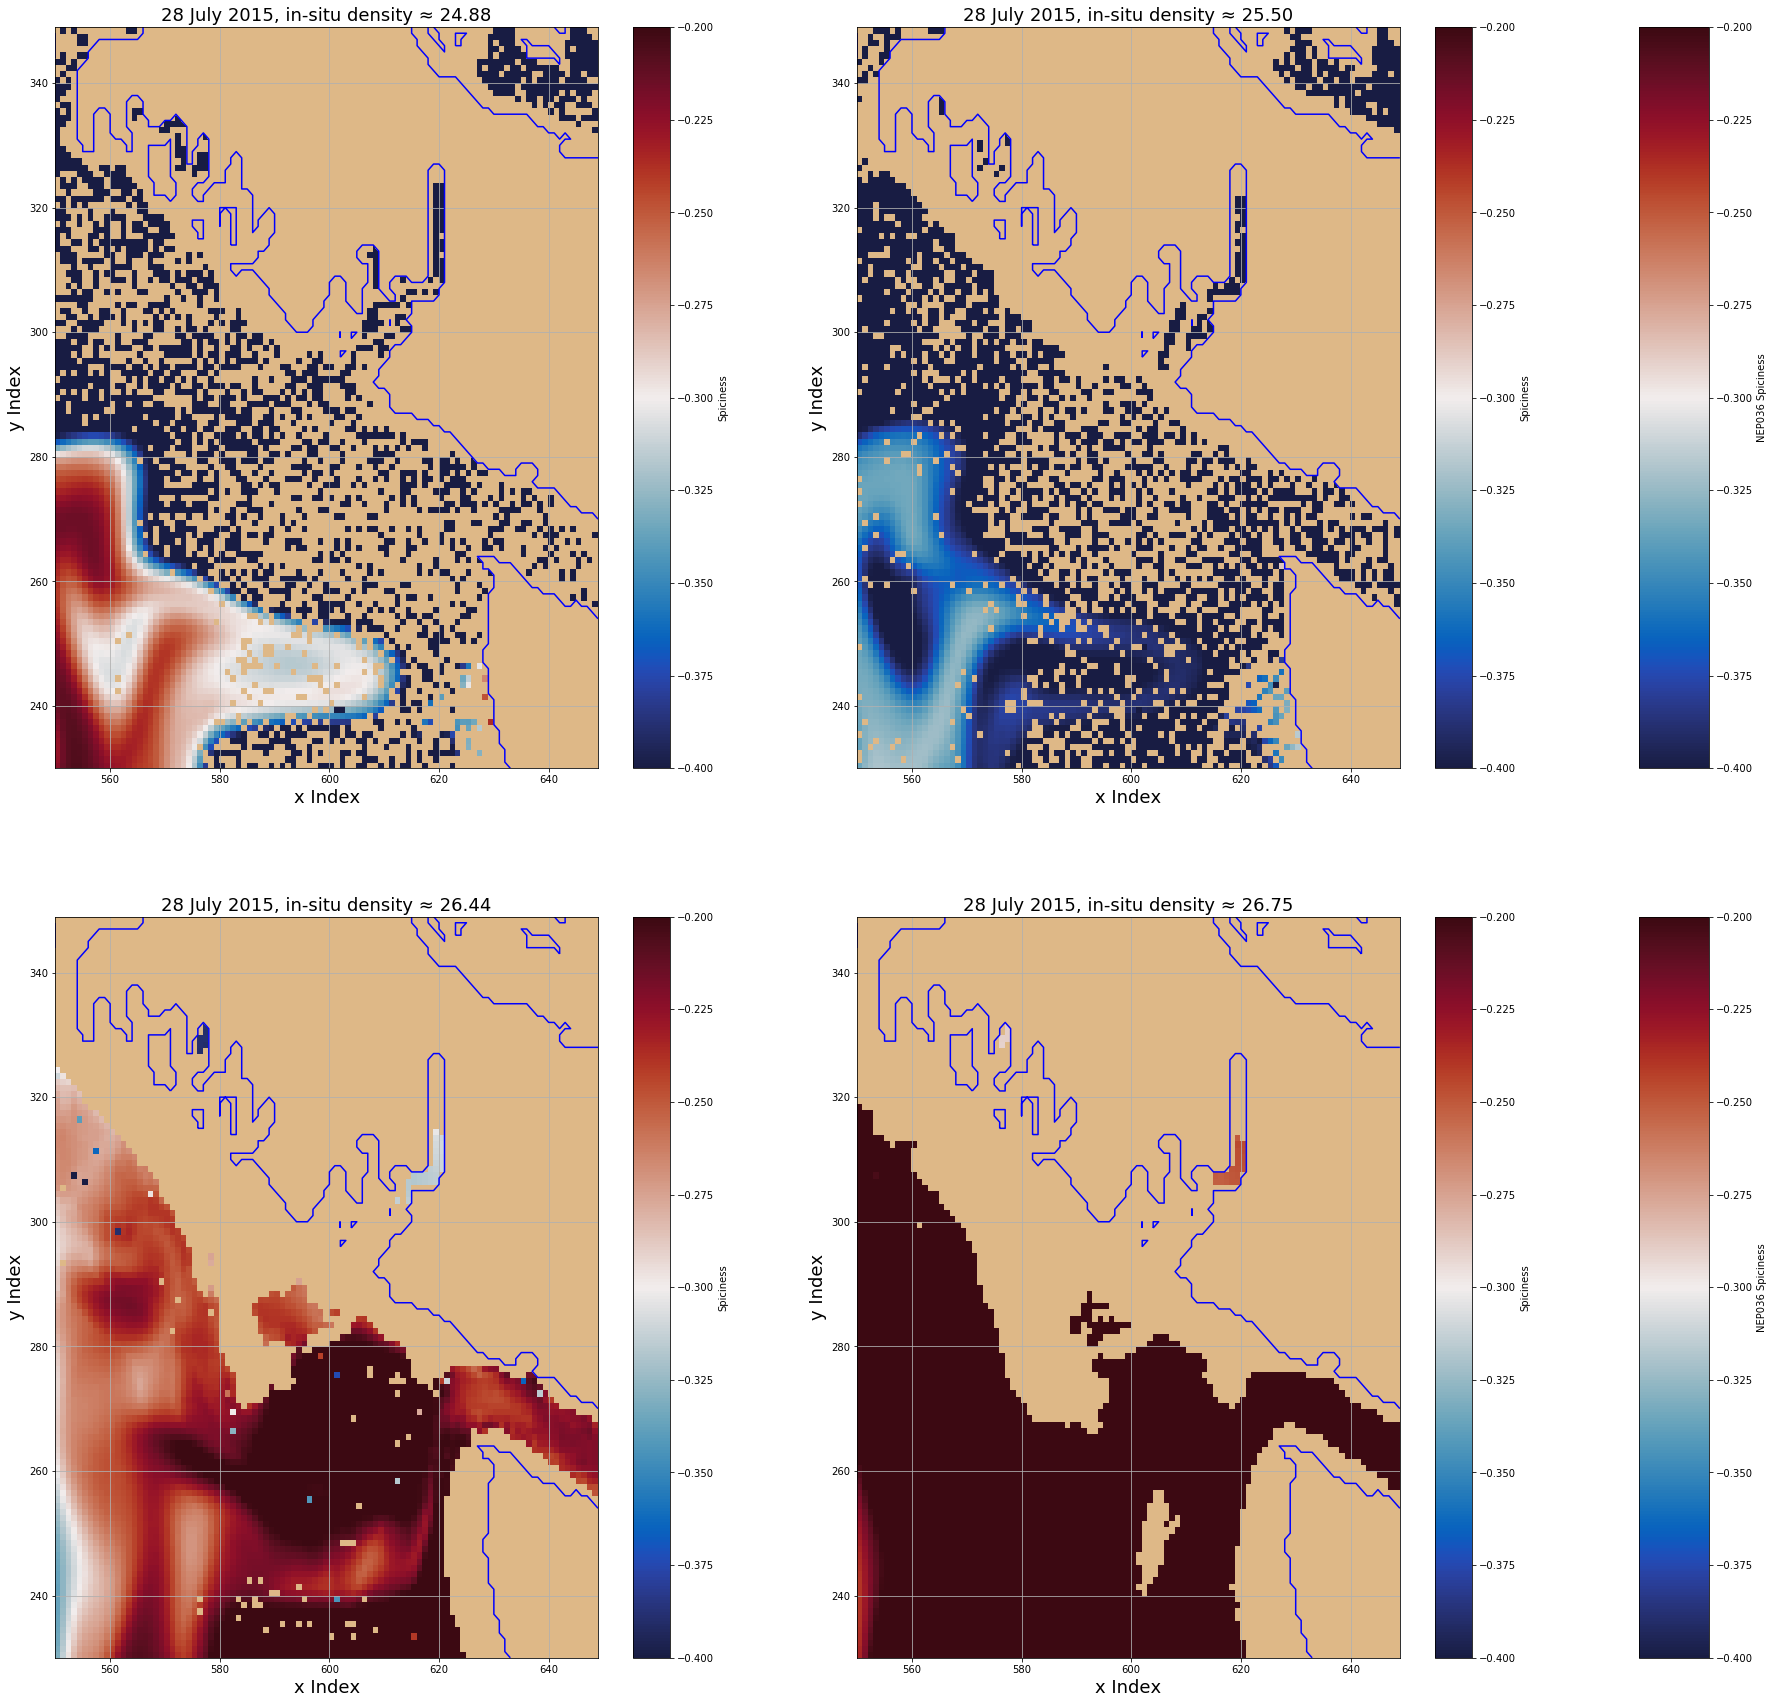

In [24]:
t= 27
level_1 = 60
level_2 = 80
level_3 = 110
level_4 = 120



cmap = plt.get_cmap(cmo.cm.haline)
cmap.set_bad('burlywood')

import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=-1,vmax=0)

fig, axs = plt.subplots(2, 3, figsize=(30, 30), gridspec_kw={'width_ratios': [10, 10, 1]})

# Set up the figure and axes
# fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(12, 8))
land_colour = 'burlywood'
# for ax in (axl, axr):
#     ax.set_axis_bgcolor(land_colour)
# axl.set_position((0.125, 0.125, 0.6, 0.775))
# axcb.set_position((0.73, 0.125, 0.02, 0.775))
# axr.set_position((0.83, 0.125, 1.3, 0.775))

# Plot 24h average salinity at all depths along thalweg line
# viz_tools.set_aspect(axs[0])
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad(land_colour)

spic_tzyx = spic_jul_iso[t,level_1,...]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(axs[0,0])
mesh = axs[0,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)
viz_tools.plot_land_mask(axs[0,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(axs[0,0], bathy ,xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='blue')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
axs[0,0].grid()
axs[0,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[0,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[0,0].set_xlabel('x Index',fontsize=18)
axs[0,0].set_ylabel('y Index',fontsize=18)
axs[0,0].set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t+1, d=iso_rho_levels[level_1], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=axs[0,0], label='Spiciness')






spic_tzyx = spic_jul_iso[t,level_2,:,:]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(axs[0,1])
mesh = axs[0,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)
viz_tools.plot_land_mask(axs[0,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(axs[0,1], bathy ,xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='blue')
axs[0,1].grid()
axs[0,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[0,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[0,1].set_xlabel('x Index',fontsize=18)
axs[0,1].set_ylabel('y Index',fontsize=18)
axs[0,1].set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t+1, d=iso_rho_levels[level_2], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=axs[0,1], label='Spiciness')




cbar = plt.colorbar(mesh, cax=axs[0,2])
cbar.set_label('NEP036 Spiciness')



spic_tzyx = spic_jul_iso[t,level_3,...]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(axs[1,0])
mesh = axs[1,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)
viz_tools.plot_land_mask(axs[1,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(axs[1,0], bathy ,xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='blue')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
axs[1,0].grid()
axs[1,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[1,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[1,0].set_xlabel('x Index',fontsize=18)
axs[1,0].set_ylabel('y Index',fontsize=18)
axs[1,0].set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t+1, d=iso_rho_levels[level_3], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=axs[1,0], label='Spiciness')


spic_tzyx = spic_jul_iso[t,level_4,...]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)

viz_tools.set_aspect(axs[1,1])
mesh = axs[1,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)
viz_tools.plot_land_mask(axs[1,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(axs[1,1], bathy ,xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='blue')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
axs[1,1].grid()
axs[1,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[1,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[1,1].set_xlabel('x Index',fontsize=18)
axs[1,1].set_ylabel('y Index',fontsize=18)
axs[1,1].set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t+1, d=iso_rho_levels[level_4], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=axs[1,1], label='Spiciness')


cbar = plt.colorbar(mesh, cax=axs[1,2])
cbar.set_label('NEP036 Spiciness')